### Librerias

In [ ]:
# Importacion de librerias Necesarias
import zipfile as zp
import subprocess as sbp
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
from sklearn.datasets import load_breast_cancer

# Metricas
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Modelo KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Modelo de Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Etapa 1: Preparacion

**Problema**

Se requiere de un modelo de **clasificacion** para cancer mama, el modelo requiere de la capacidad de que mediante los datos requeridos determine si el tumor es benigno o maligno, esto para saber que tan grave es el caso del paciente, y poder determinar a tiempo que tratamiento se le dara.

**Aproximacion analitica:**

* **Tipo de problema de ML:** *Clasificacion*
* **Posibles Algoritmos a usar:** *Vecinos mas cercanos y arboles de desicion*
* **Metricas:** Exactitud, Precisión

# Etapa 2: Trabajar con los datos

In [10]:
# Decarga de los datos

url = 'https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip'
file_path = "wdbc.data"

sbp.call(["curl", url, "-o", "data.zip"])

with zp.ZipFile("data.zip", 'r') as zip_ref:
    zip_ref.extract(file_path, "./")

columns_names = [
                 "id",
                 "diagnostico",
                 "radio_media",
                 "textura_media",
                 "perimetro_media",
                 "area_media",
                 "suavidad_media",
                 "compacidad_media",
                 "concavidad_media",
                 "puntos_concavos_media",
                 "simetria_media",
                 "dimension_fractal_media",
                 "radio_se", 
                 "textura_se",
                 "perimetro_se", 
                 "area_se",
                 "suavidad_se",
                 "compacidad_se",
                 "concavidad_se", 
                 "puntos_concavos_se", 
                 "simetria_se", 
                 "dimensión_fractal_se",
                 "radio_peor", 
                 "textura_peor", 
                 "perimetro_peor", 
                 "area_peor", 
                 "suavidad_peor", 
                 "compacidad_peor", 
                 "concavidad_peor", 
                 "puntos_concavos_peor", 
                 "simetria_peor", 
                 "dimension_fractal_peor"
]   

data = pd.read_csv(file_path, header=None, sep=',',names = columns_names)    
data.head()

,id,diagnostico,radio_media,textura_media,perimetro_media,area_media,suavidad_media,compacidad_media,concavidad_media,puntos_concavos_media,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compacidad_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
load_breast_cancer(as_frame=True)['target'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: target
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [12]:
# Exploracion rapida
data.info()
print(data.describe(include='all'))
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnostico              569 non-null    object 
 2   radio_media              569 non-null    float64
 3   textura_media            569 non-null    float64
 4   perimetro_media          569 non-null    float64
 5   area_media               569 non-null    float64
 6   suavidad_media           569 non-null    float64
 7   compacidad_media         569 non-null    float64
 8   concavidad_media         569 non-null    float64
 9   puntos_concavos_media    569 non-null    float64
 10  simetria_media           569 non-null    float64
 11  dimension_fractal_media  569 non-null    float64
 12  radio_se                 569 non-null    float64
 13  textura_se               569 non-null    float64
 14  perimetro_se             5

,id,diagnostico,radio_media,textura_media,perimetro_media,area_media,suavidad_media,compacidad_media,concavidad_media,puntos_concavos_media,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compacidad_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor
26,852763,M,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,...,17.62,33.21,122.40,896.9,0.15250,0.66430,0.55390,0.27010,0.4264,0.12750
52,857374,B,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,...,13.10,21.33,83.67,527.2,0.11440,0.08906,0.09203,0.06296,0.2785,0.07408
521,91762702,M,24.630,21.60,165.50,1841.0,0.10300,0.21060,0.23100,0.14710,...,29.92,26.93,205.70,2642.0,0.13420,0.41880,0.46580,0.24750,0.3157,0.09671
63,859196,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
533,91930402,M,20.470,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.10150,...,23.23,27.15,152.00,1645.0,0.10970,0.25340,0.30920,0.16130,0.3220,0.06386


In [13]:
# convertir diagnosticos a valores numericos

data['diagnostico'] = data['diagnostico'].map({'M': 1, 'B':0})

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnostico              569 non-null    int64  
 2   radio_media              569 non-null    float64
 3   textura_media            569 non-null    float64
 4   perimetro_media          569 non-null    float64
 5   area_media               569 non-null    float64
 6   suavidad_media           569 non-null    float64
 7   compacidad_media         569 non-null    float64
 8   concavidad_media         569 non-null    float64
 9   puntos_concavos_media    569 non-null    float64
 10  simetria_media           569 non-null    float64
 11  dimension_fractal_media  569 non-null    float64
 12  radio_se                 569 non-null    float64
 13  textura_se               569 non-null    float64
 14  perimetro_se             5

In [15]:
# Entrenamiento

columns_ness = [
                "radio_media",
                "radio_peor",
                "area_media",
                "area_peor",
                "concavidad_media",
                "concavidad_peor",
                "puntos_concavos_media",
                "puntos_concavos_peor",
                "perimetro_media",
                "perimetro_peor",
                "textura_media",
                "textura_peor",
                "compacidad_media",
                "compacidad_peor",
                "suavidad_media",
                "suavidad_peor",
                "simetria_media",
                "simetria_peor",
                "dimension_fractal_media",
                "dimension_fractal_peor"
               ]

X = data[columns_ness]
y = data['diagnostico']


# Etapa 3: Experimentacion

In [16]:
# Modelos

modelo_arbol = DecisionTreeClassifier()
modelo_vecinos = KNeighborsClassifier()

modelos = [modelo_arbol, modelo_vecinos]

In [ ]:
# Entrenamiento de los modelos

for modelo in modelos:+
    modelo.fit(X, y)

In [19]:
# Evaluacion de lo modelos

for modelo in modelos:
    y_pred = modelo.predict(X)
    print(f"Modelo {modelo.__class__.__name__}")
    print(f"Exactitud: {accuracy_score(y, y_pred)}")
    print(f"Presicion: {precision_score(y, y_pred)}")
    print(classification_report(y, y_pred))

Modelo DecisionTreeClassifier
Exactitud: 1.0
Presicion: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       212

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569

Modelo KNeighborsClassifier
Exactitud: 0.9437609841827768
Presicion: 0.9455445544554455
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       357
           1       0.95      0.90      0.92       212

    accuracy                           0.94       569
   macro avg       0.94      0.94      0.94       569
weighted avg       0.94      0.94      0.94       569



# Etapa 4: Produccion

#### pruebas con tumores malignos

In [35]:
# Columnas de entrenamiento

columnas = [
                "radio_media",
                "radio_peor",
                "area_media",
                "area_peor",
                "concavidad_media",
                "concavidad_peor",
                "puntos_concavos_media",
                "puntos_concavos_peor",
                "perimetro_media",
                "perimetro_peor",
                "textura_media",
                "textura_peor",
                "compacidad_media",
                "compacidad_peor",
                "suavidad_media",
                "suavidad_peor",
                "simetria_media",
                "simetria_peor",
                "dimension_fractal_media",
                "dimension_fractal_peor"
               ]

In [44]:
prueba1 = pd.DataFrame([[
    20.5, 25.8, 1320.0, 1450.0, 0.6, 0.9, 0.2, 0.4, 130.0, 150.0, 27.4, 35.0, 0.25, 0.4,
    0.1, 0.3, 0.3, 0.5, 0.07, 0.1
]], columns=columnas)
prueba1

,radio_media,radio_peor,area_media,area_peor,concavidad_media,concavidad_peor,puntos_concavos_media,puntos_concavos_peor,perimetro_media,perimetro_peor,textura_media,textura_peor,compacidad_media,compacidad_peor,suavidad_media,suavidad_peor,simetria_media,simetria_peor,dimension_fractal_media,dimension_fractal_peor
0,20.5,25.8,1320.0,1450.0,0.6,0.9,0.2,0.4,130.0,150.0,27.4,35.0,0.25,0.4,0.1,0.3,0.3,0.5,0.07,0.1


In [45]:
prueba2 = pd.DataFrame([[
    12.5, 14.0, 600.0, 650.0, 0.2, 0.3, 0.05, 0.1, 80.0, 85.0, 16.0, 20.0, 0.1, 0.15,
    0.05, 0.1, 0.2, 0.3, 0.05, 0.07
]], columns=columnas)
prueba2

,radio_media,radio_peor,area_media,area_peor,concavidad_media,concavidad_peor,puntos_concavos_media,puntos_concavos_peor,perimetro_media,perimetro_peor,textura_media,textura_peor,compacidad_media,compacidad_peor,suavidad_media,suavidad_peor,simetria_media,simetria_peor,dimension_fractal_media,dimension_fractal_peor
0,12.5,14.0,600.0,650.0,0.2,0.3,0.05,0.1,80.0,85.0,16.0,20.0,0.1,0.15,0.05,0.1,0.2,0.3,0.05,0.07


In [46]:
# Arbol de desicion

print("Predicción del tumor 1 (maligno):", modelo_arbol.predict(prueba1))
print("Predicción del tumor 2 (benigno):", modelo_arbol.predict(prueba2))


Predicción del tumor 1 (maligno): [1]
Predicción del tumor 2 (benigno): [0]


In [47]:
# Vecinos cercanos

print("Predicción del tumor 1 (maligno):", modelo_vecinos.predict(prueba1))
print("Predicción del tumor 2 (benigno):", modelo_vecinos.predict(prueba2))

Predicción del tumor 1 (maligno): [1]
Predicción del tumor 2 (benigno): [0]


<function matplotlib.pyplot.show(close=None, block=None)>

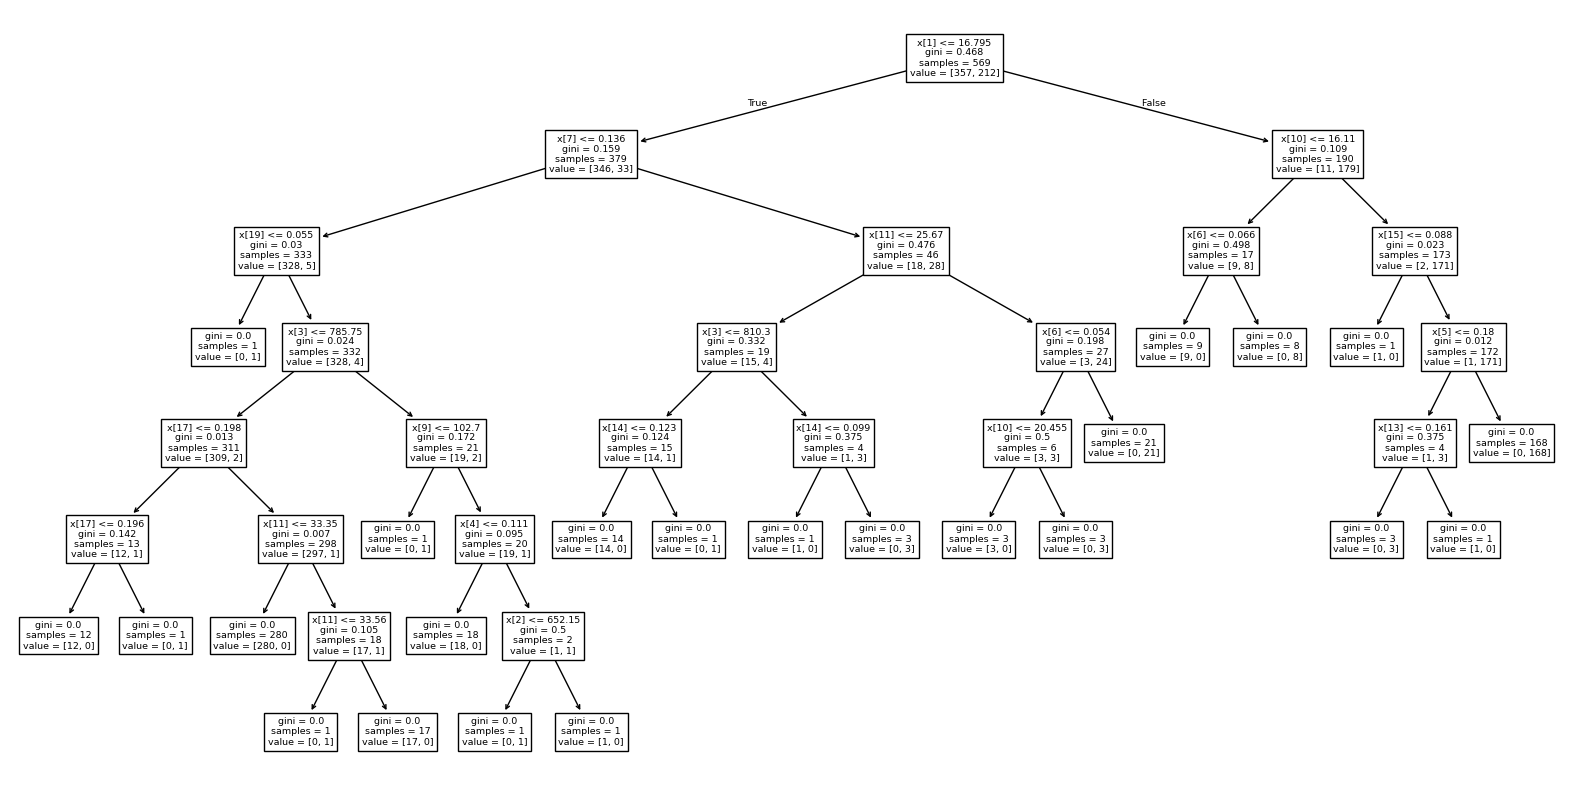

In [32]:
plt.figure(figsize=(20, 10))
plot_tree(modelo_arbol)
plt.show